For circular orbit, we demand $\ddot{u} = 0$, thus yielding : $r_0 = 1.5r_s $

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Constants
G = 6.67430e-11                 # Gravitational constant [m^3/kg/s^2]
M = 1.989e30                    # Mass of the Sun [kg]
AU = 1.496e11                   # Astronomical unit [m]
c = 299792458                   # Speed of light [m/s]
r_s = 2 * G * M / c**2          # Schwarzschild radius [m]

In [13]:
# Define the ODE system for photon orbit: [u, v] -> [du/dphi, dv/dphi]
def photon_ode(_, y):
    u, v = y
    return np.array([v, (3 * G * M * u**2 / c**2) - u])

# Runge-Kutta 4th order integrator
def rk4_step(f, x, y, h):
    k1 = h * f(x, y)
    k2 = h * f(x + h/2, y + k1/2)
    k3 = h * f(x + h/2, y + k2/2)
    k4 = h * f(x + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

# General solver using RK4
def solve_ode(f, x_vals, y0, h):
    ys = np.zeros((len(x_vals), len(y0)))
    y = y0.copy()
    for i, x in enumerate(x_vals):
        ys[i] = y
        y = rk4_step(f, x, y, h)
    return ys

In [14]:
# Initial Conditions (tweak as needed)
r0 = 1.50 * r_s
u0 = 1 / r0
v0 = 0

In [15]:
# Simulation parameters
h = 0.0001
n_orbits = 100
phis = np.arange(0, 2 * np.pi * n_orbits, h)
y_ini = np.array([u0, v0])

# Solve the system
solution = solve_ode(photon_ode, phis, y_ini, h)
rs = 1 / solution[:, 0] / AU  # Convert to AU

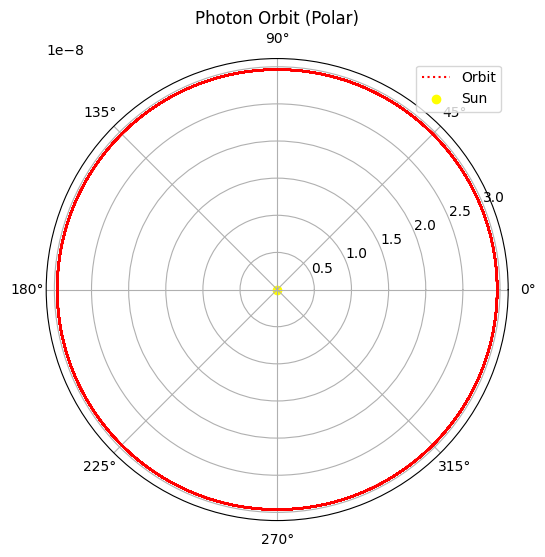

In [16]:
# Polar Plot
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.plot(phis, rs, linestyle="dotted", color="red",label = 'Orbit')
ax.scatter([0], [0], label="Sun", color="yellow")
plt.title("Photon Orbit (Polar)")
plt.legend()
plt.show()

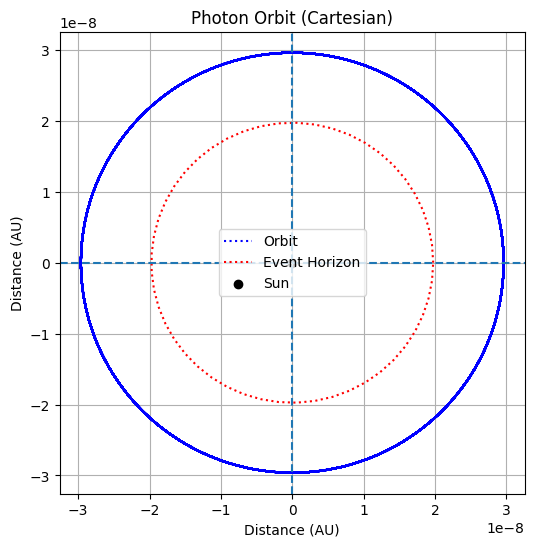

In [17]:
# Cartesian Coordinates
x_vals = rs * np.cos(phis)
y_vals = rs * np.sin(phis)

plt.figure(figsize=(6, 6))
plt.plot(x_vals, y_vals, color='blue', linestyle='dotted',label = 'Orbit')
plt.plot(r_s * np.cos(np.linspace(0,2*np.pi)) / AU, r_s * np.sin(np.linspace(0,2*np.pi)) / AU, 'r:', label="Event Horizon")
plt.axhline(0, linestyle='dashed')
plt.axvline(0, linestyle='dashed')
plt.scatter([0], [0], color='black', label="Sun")
plt.xlabel("Distance (AU)")
plt.ylabel("Distance (AU)")
plt.title("Photon Orbit (Cartesian)")
plt.grid(True)
plt.legend()
plt.show()

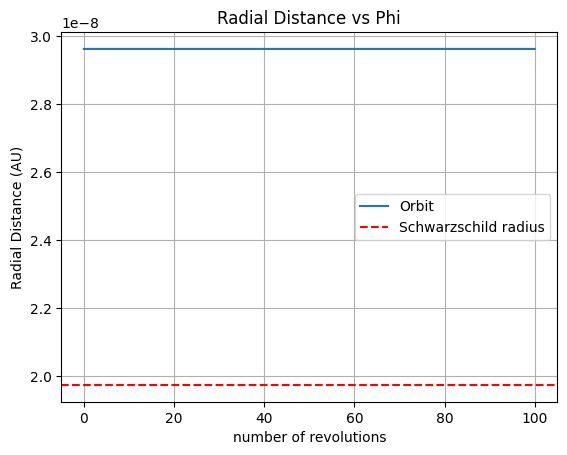

In [18]:
# r vs phi Plot
plt.plot(phis/2/np.pi, rs,label = 'Orbit')
plt.axhline(r_s / AU, color='red', linestyle='--', label="Schwarzschild radius")
plt.xlabel("number of revolutions")
plt.ylabel("Radial Distance (AU)")
plt.title("Radial Distance vs Phi")
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Summary Output
print("Minimum radial distance (m):", AU * max(np.min(rs),0))
print("Schwarzschild radius (m):", r_s)
print("Photon captured by black hole" if AU * np.min(rs) < r_s else "Photon escaped the black hole")

Minimum radial distance (m): 4431.189832583107
Schwarzschild radius (m): 2954.126555055405
Photon escaped the black hole


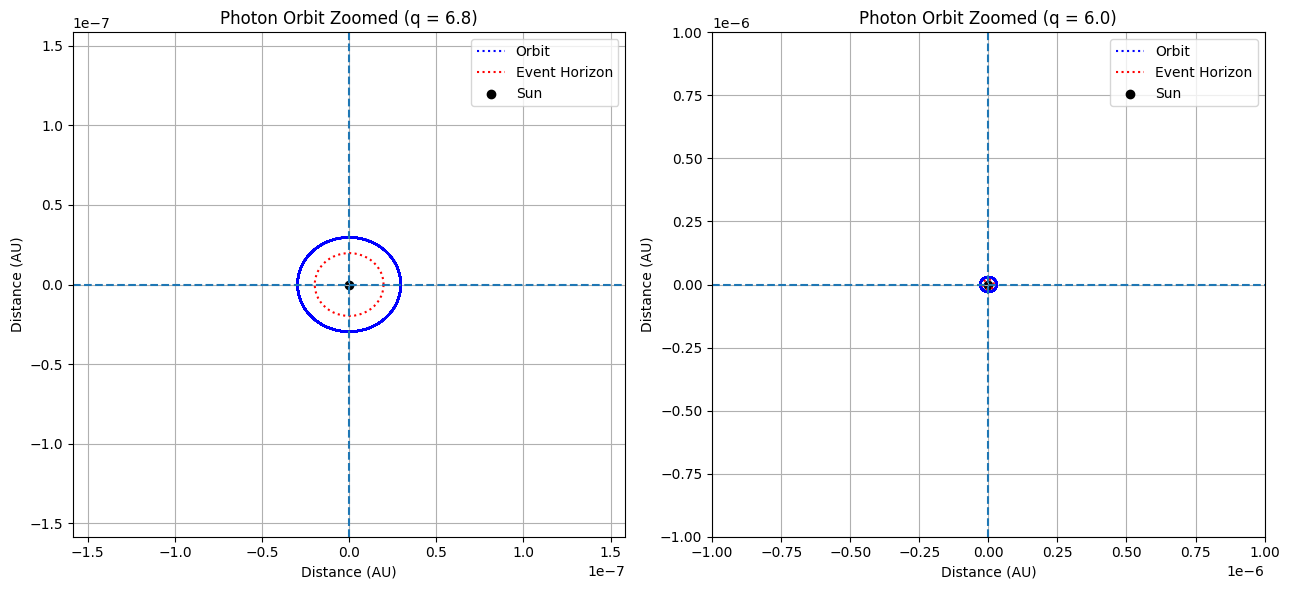

In [20]:
# Zoomed plots (subplots)
def zoom_plot(q, title):
    plt.plot(x_vals, y_vals, color='blue', linestyle='dotted',label = 'Orbit')
    plt.plot(r_s * np.cos(np.linspace(0,2*np.pi)) / AU, r_s * np.sin(np.linspace(0,2*np.pi)) / AU, 'r:', label="Event Horizon")
    plt.xlim(-10**-q, 10**-q)
    plt.ylim(-10**-q, 10**-q)
    plt.axhline(0, linestyle='dashed')
    plt.axvline(0, linestyle='dashed')
    plt.scatter([0], [0], color='black', label="Sun")
    plt.title(title)
    plt.xlabel("Distance (AU)")
    plt.ylabel("Distance (AU)")
    plt.grid(True)
    plt.legend()

plt.figure(figsize=(13, 6))

plt.subplot(1, 2, 1)
zoom_plot(6.8, "Photon Orbit Zoomed (q = 6.8)")

plt.subplot(1, 2, 2)
zoom_plot(6.0, "Photon Orbit Zoomed (q = 6.0)")

plt.tight_layout()
plt.show()
